In [32]:
import pickle
from torchvision import datasets, transforms
import torch
import numpy as np

POISON_SETUPS_PATH = "../poison_setups/cifar10_transfer_learning.pickle"
with open(POISON_SETUPS_PATH, "rb") as handle:
    setup_dicts = pickle.load(handle)

In [6]:
setup = setup_dicts[0]

In [10]:
target_class = setup["target class"]
target_img_idx = setup["target index"]
poisoned_label = setup["base class"]
base_indices = setup["base indices"]
num_poisons = len(base_indices)

trainset = datasets.CIFAR10(root="../data", train=True, download=True,
                                    transform=transforms.ToTensor())
testset = datasets.CIFAR10(root="../data", train=False, download=True,
                                    transform=transforms.ToTensor())

target_img, target_label = testset[target_img_idx]

#note that for Badnets, we don't care about the base images
base_imgs = torch.stack([trainset[i][0] for i in base_indices])
base_labels = torch.LongTensor([trainset[i][1] for i in base_indices])

Files already downloaded and verified
Files already downloaded and verified


In [12]:
base_imgs.shape

torch.Size([25, 3, 32, 32])

In [15]:
base_labels.shape

torch.Size([25])

In [16]:
len(base_labels)

25

In [17]:
len(base_imgs)

25

In [37]:
L = torch.stack([x for (x,y) in trainset if y == 0])

In [51]:
ixs = torch.randperm(len(L))

In [56]:
sample = L[ixs[:50]]

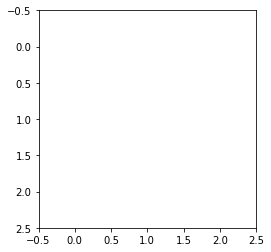

In [70]:
plt.imshow(torch.ones(3,3,3))

In [108]:
from matplotlib import pyplot as plt
color = torch.stack([1*torch.ones(5,5), torch.ones(5,5), 0*torch.ones(5,5)])
print(color.shape)
#color.transpose_(0, -1)
#plt.imshow(color)

torch.Size([3, 5, 5])


In [102]:
color.transpose(0, -1).shape
sample[0].shape

torch.Size([3, 32, 32])

In [122]:
sample[:,:,:5, :5] = color

In [93]:
x = torch.randn(2,5)
print(x, '\n',x.transpose(0,-1))

tensor([[ 2.5749,  0.3584, -0.6171, -0.7322, -0.5406],
        [ 0.7570, -0.1449,  1.0924, -0.4167, -0.1120]]) 
 tensor([[ 2.5749,  0.7570],
        [ 0.3584, -0.1449],
        [-0.6171,  1.0924],
        [-0.7322, -0.4167],
        [-0.5406, -0.1120]])


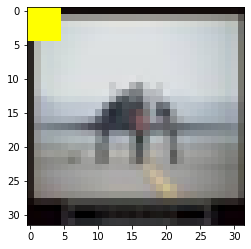

In [127]:
plt.imshow(sample[39].permute(1,2,0))

In [118]:
sample[0].shape

torch.Size([3, 32, 32])

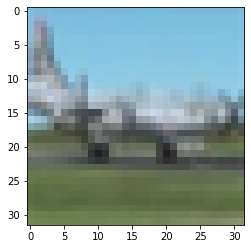

In [131]:
plt.imshow(L[ixs[:50]][0].permute(1,2,0))

In [132]:
def apply_yellow_patch(batch, start_x = 0, start_y = 0, size = 5):
    '''
    Apply a trigger (yellow patch) onto a batch of images.
    '''
    patch = torch.stack([torch.ones(size,size), torch.ones(size,size), torch.zeros(size,size)])
    batch[:,:, start_y:start_y + size, start_x: start_x + 5] = patch

    return batch

In [137]:
res = apply_yellow_patch(L[ixs[:50]], 10, 0, 5)

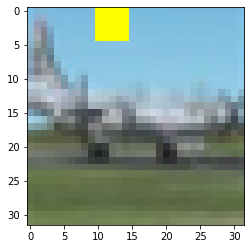

In [138]:
plt.imshow(res[0].permute(1,2,0))

In [139]:
from torchvision import transforms

In [140]:
t = transforms.ToPILImage()

In [149]:
x = t(res[0])
print(x)

<PIL.Image.Image image mode=RGB size=32x32 at 0x7FD85CE9F4F0>


In [150]:
res.shape

torch.Size([50, 3, 32, 32])

In [151]:
poison_tuples = [(t(res[i]), 0) for i in range(len(res))]


In [153]:
len(poison_tuples)

50

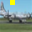

In [154]:
t(res[0])

In [176]:
with open(f'badnets_poisons/{0}/target.pickle','rb') as handle:
        base = pickle.load(handle)

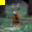

In [173]:
base[0][0]

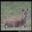

In [179]:
base[0]